## EDA 치트키 무작정 따라해 보기

In [2]:
#필요한 라이브러리 호출

import os 
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #https://wikidocs.net/92114
import matplotlib.font_manager as fm
import seaborn as sns
import missingno

In [3]:
warnings.filterwarnings("ignore")

### 데이터 출처
* [기상자료 개방포털](https://data.kma.go.kr/stcs/grnd/grndTaList.do?pgmNo=70)
* [서울열린데이터광장](http://data.seoul.go.kr/dataList/OA-15245/F/1/datasetView.do)

In [4]:
# 데이터 경로
seoul_data_path = os.path.join("seoul_temp.csv") #서울 평균 기온
bike_data_path = os.path.join('bike1.csv') #따릉이 시간대별 이용자 데이터

In [5]:
sel_temp = pd.read_csv(seoul_data_path )
sel_temp.head()

,년,지점,평균기온,최저기온,최고기온
0,1907,108,NaN,-20.1,25.4
1,1908,108,10.4,-15.8,33.6
2,1909,108,10.6,-14.6,35.6
3,1910,108,10.3,-19.9,33.3
4,1911,108,10.6,-21.5,34.5


In [6]:
sel_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   년       115 non-null    int64  
 1   지점      115 non-null    int64  
 2   평균기온    109 non-null    float64
 3   최저기온    113 non-null    float64
 4   최고기온    113 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.6 KB


In [7]:
sel_temp.tail()

,년,지점,평균기온,최저기온,최고기온
110,2017,108,13.0,-12.6,35.4
111,2018,108,12.9,-17.8,39.6
112,2019,108,13.5,-10.9,36.8
113,2020,108,13.2,-12.9,35.4
114,2021,108,NaN,-18.6,30.8


In [8]:
sel_temp.shape

(115, 5)

In [9]:
# NA, null값이 있는지 시각화하여 확인
font_path = r'C:\Users\user\NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

<AxesSubplot:>

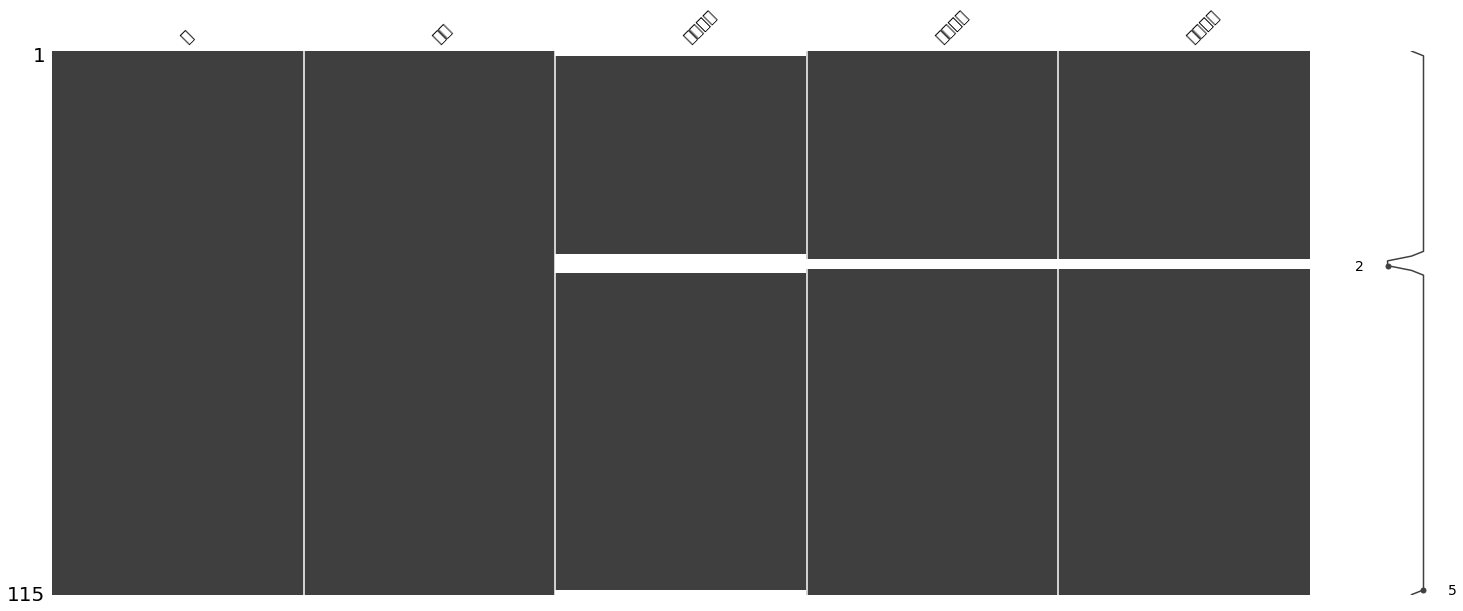

In [10]:
missingno.matrix(sel_temp)

In [11]:
sel_temp.isnull().sum()

년       0
지점      0
평균기온    6
최저기온    2
최고기온    2
dtype: int64

In [12]:
# 결측치 확인 함수짜기

def na_chk(data):
    na_val = data.isnull().sum()
    na_ratio = round(na_val / len(data)*100, 2)
    return na_val, na_ratio

In [13]:
na_chk(sel_temp)

(년       0
 지점      0
 평균기온    6
 최저기온    2
 최고기온    2
 dtype: int64,
 년       0.00
 지점      0.00
 평균기온    5.22
 최저기온    1.74
 최고기온    1.74
 dtype: float64)

In [14]:
# 결측치를 채워주는 함수
def na_fill(data):
    na_val_fill = data.fillna(method = 'bfill')
    return na_val_fill

In [15]:
data=na_fill(sel_temp)
data

,년,지점,평균기온,최저기온,최고기온
0,1907,108,10.4,-20.1,25.4
1,1908,108,10.4,-15.8,33.6
2,1909,108,10.6,-14.6,35.6
3,1910,108,10.3,-19.9,33.3
4,1911,108,10.6,-21.5,34.5
...,...,...,...,...,...
110,2017,108,13.0,-12.6,35.4
111,2018,108,12.9,-17.8,39.6
112,2019,108,13.5,-10.9,36.8
113,2020,108,13.2,-12.9,35.4


<AxesSubplot:>

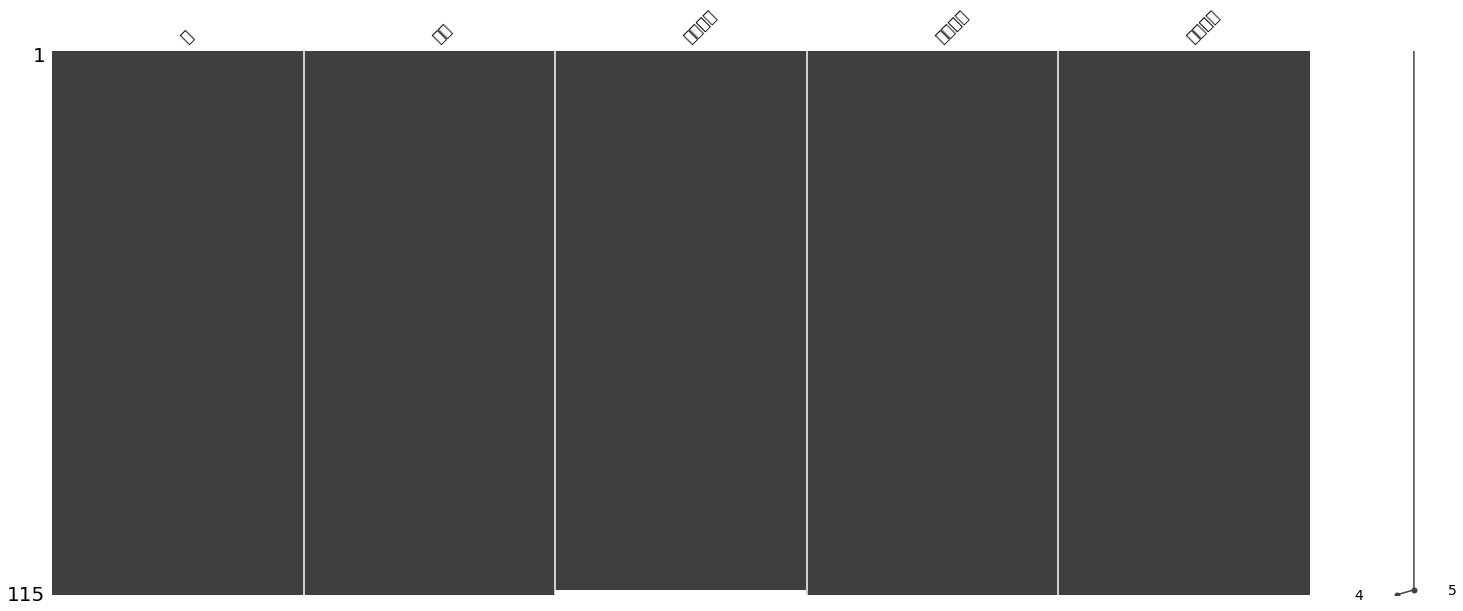

In [16]:
missingno.matrix(data)

In [17]:
#컬럼의 유니크한 값을 가져올때
data['지점'].unique()

array([108], dtype=int64)

In [18]:
bike_data = pd.read_csv(bike_data_path, encoding = 'cp949')
bike_data.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


<AxesSubplot:>

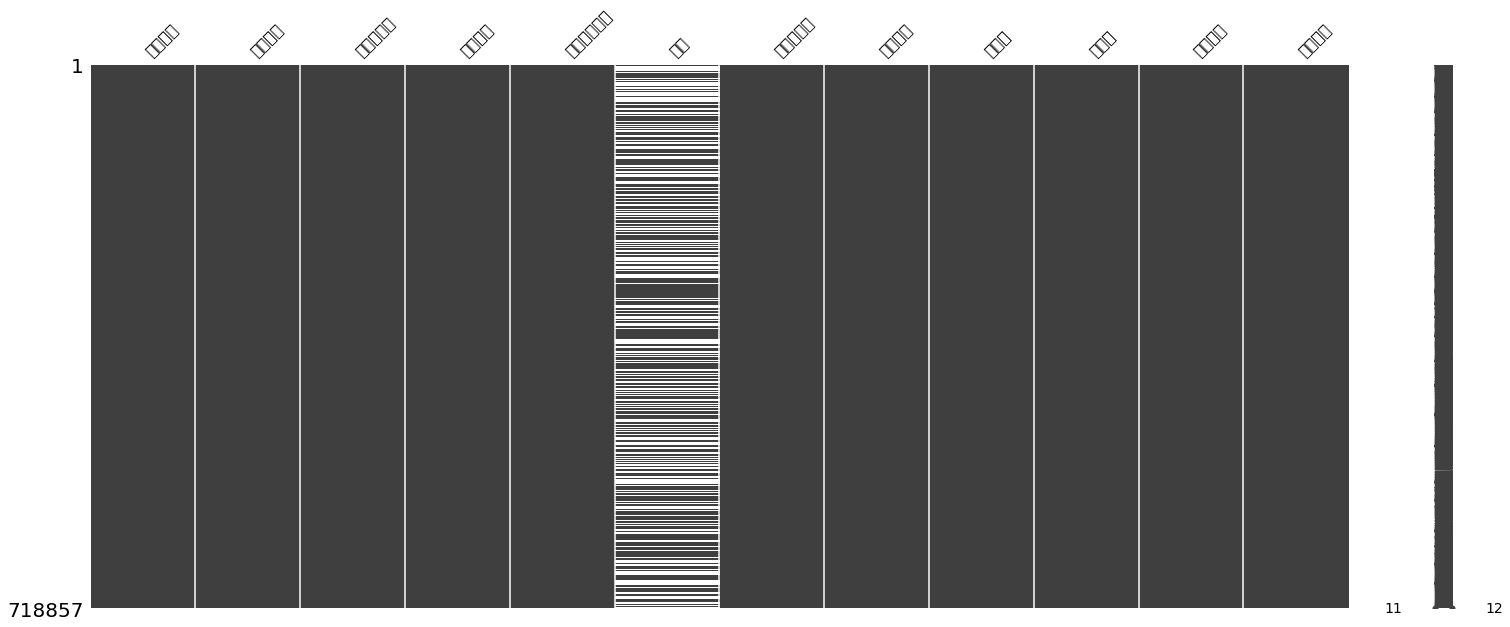

In [19]:
missingno.matrix(bike_data)

In [20]:
del bike_data['성별']
bike_data

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,~10대,2,28.90,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,~10대,1,0.00,0.00,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,~10대,1,12.96,0.17,743.88,5
...,...,...,...,...,...,...,...,...,...,...,...
718852,2021-01-31,23,207,207. 여의나루역 1번출구 앞,단체권,~10대,5,916.66,8.66,37335.95,219
718853,2021-01-31,23,3549,3549.건영아파트 앞,단체권,20대,2,492.87,4.51,19447.10,133
718854,2021-01-31,23,248,248. 초원아파트 앞,단체권,20대,2,348.43,2.91,12569.64,90
718855,2021-01-31,23,131,131. 증산2교,단체권,20대,2,98.10,0.77,3302.87,20


In [21]:
bike_data['대여구분코드'].unique()

array(['정기권', '일일권', '단체권', '일일권(비회원)'], dtype=object)

In [22]:
print(len(bike_data['대여소번호'].unique()))

2188


In [23]:
print(len(bike_data['대여소명'].unique()))

2188


In [24]:
print(len(bike_data['연령대코드'].unique()))

7


In [25]:
bike_data['연령대코드'].unique()

array(['~10대', '20대', '30대', '40대', '50대', '60대', '70대~'], dtype=object)

In [26]:
na_chk(bike_data['연령대코드'])

(0, 0.0)

In [27]:
# teen_ages = bike_data.loc[bike_data['연령대코드']== '~10대']
# teens =teen_ages.연령대코드.str.split('~').str[1]
# teens

In [28]:
bike_data_ages = bike_data['연령대코드'].str.replace(pat=r'[^\w]', repl=r'', regex=True)

#정규표현식으로 특수문자를 공백으로 바꿔주기 : r'[^\w]' (특수문자표현)

In [29]:
bike_data_ages = bike_data_ages.str.split('대').str[0]
bike_data_ages

0         10
1         10
2         10
3         10
4         10
          ..
718852    10
718853    20
718854    20
718855    20
718856    40
Name: 연령대코드, Length: 718857, dtype: object

In [30]:
te = []
tw = []
th = []
fo = []
fi= []
si= []
se = []

for age in range(len(bike_data_ages)):
    if bike_data_ages[age]== '10':
        te.append(bike_data_ages[age])
    elif bike_data_ages[age]== '20':
        tw.append(bike_data_ages[age])
    elif bike_data_ages[age]== '30':
        th.append(bike_data_ages[age])
    elif bike_data_ages[age]== '40':
        fo.append(bike_data_ages[age])   
    elif bike_data_ages[age]== '50':
        fi.append(bike_data_ages[age])
    elif bike_data_ages[age]== '60':
        si.append(bike_data_ages[age]) 
    elif bike_data_ages[age]== '70':
        se.append(bike_data_ages[age])  

In [31]:
print(len(te))

26875


In [32]:
a = [len(te),len(tw),len(th),len(fo),len(fi),len(si),len(se)] 
a

[26875, 270097, 183196, 127363, 80887, 26416, 4023]

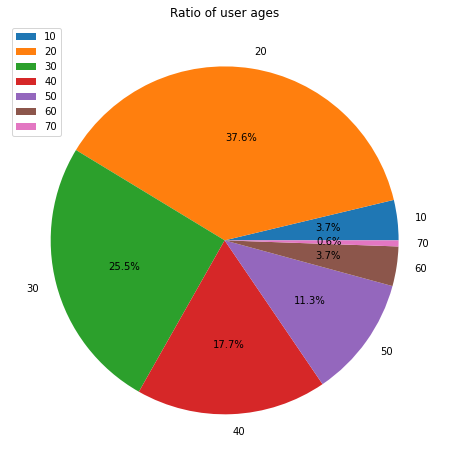

In [33]:
ratio = a
labels = ['10', '20', '30', '40', '50', '60', '70']

plt.figure(figsize = (8,8))
plt.pie(ratio, labels=labels, autopct='%.1f%%', )
plt.title('Ratio of user ages')
plt.legend()
plt.show()

In [34]:
bike_data.columns

Index(['대여일자', '대여시간', '대여소번호', '대여소명', '대여구분코드', '연령대코드', '이용건수', '운동량',
       '탄소량', '이동거리', '사용시간'],
      dtype='object')

### 서울시 온도 데이터

In [35]:
sel_temp.columns

Index(['년', '지점', '평균기온', '최저기온', '최고기온'], dtype='object')

--------------------------------------------------
--평균기온--


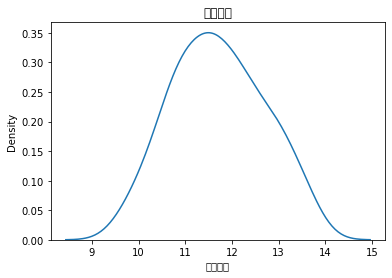

--------------------------------------------------
--최저기온--


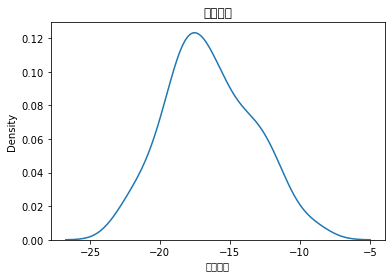

--------------------------------------------------
--최고기온--


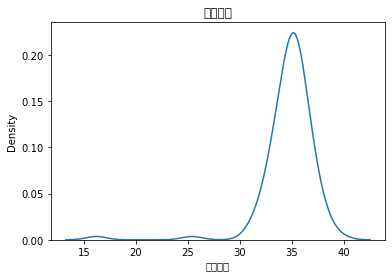

In [39]:
#seabon kdeplot으로 columns 값을 시각화하는 루프짜기
# 서울시 연평균 온도

for col in sel_temp.columns:
    if col in ['년', '지점']:
        continue
    print('-'*50)
    print(f'--{col}--')
    
    plt.title(f'{col}')
    sns.kdeplot(sel_temp[col])
    plt.show()
    


**************************************************
--평균기온--


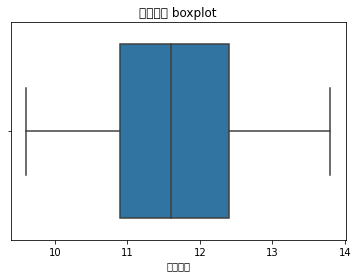

**************************************************
--최저기온--


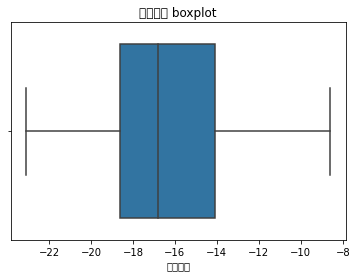

**************************************************
--최고기온--


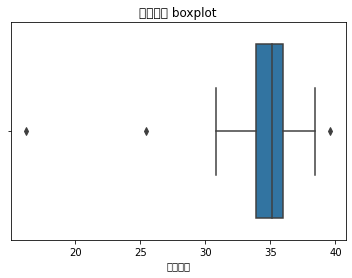

In [42]:
for col in sel_temp.columns:
    # 날짜, id column은 스킵할게요
    if col in ['년', '지점']:
        continue
    print("*" * 50)
    print(f"--{col}--")
#     sns.distplot(weather[col], kde=False)
    plt.title(f"{col} boxplot")
    sns.boxplot(sel_temp[col], orient='v')
    plt.show()

**************************************************
--평균기온--


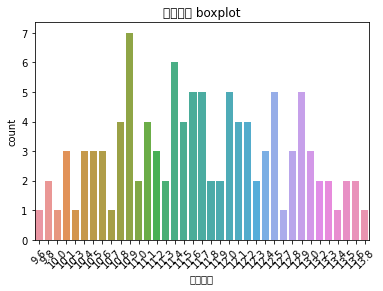

**************************************************
--최저기온--


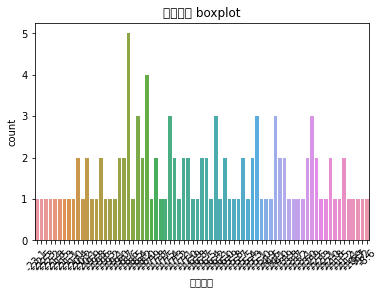

**************************************************
--최고기온--


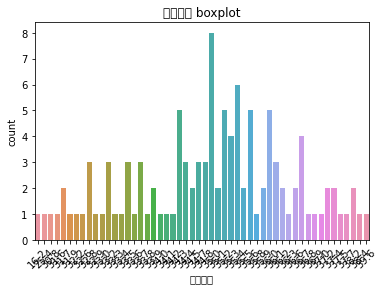

In [64]:
for col in sel_temp.columns:
    # 날짜, id column은 스킵할게요
    if col in ['년', '지점']:
        continue
    print("*" * 50)
    print(f"--{col}--")
#     sns.distplot(weather[col], kde=False)
    plt.title(f"{col} boxplot")
    sns.countplot(col, data = sel_temp)
    plt.xticks(rotation=45)
    plt.show()

In [43]:
type(sel_temp["년"][0])

numpy.int64

In [44]:
# index 를 datetime으로 바꿔야 함
sel_temp["년"] = sel_temp["년"].map(lambda x : str(x))
sel_temp["년"]

0      1907
1      1908
2      1909
3      1910
4      1911
       ... 
110    2017
111    2018
112    2019
113    2020
114    2021
Name: 년, Length: 115, dtype: object

In [45]:
sel_temp.set_index( pd.to_datetime(sel_temp["년"]) , inplace=True ) 

In [46]:
seltemp_2 = sel_temp.copy()

In [47]:
sel_temp.drop("년", axis=1, inplace=True)

In [48]:
sel_temp.head()

,지점,평균기온,최저기온,최고기온
년,,,,
1907-01-01,108,NaN,-20.1,25.4
1908-01-01,108,10.4,-15.8,33.6
1909-01-01,108,10.6,-14.6,35.6
1910-01-01,108,10.3,-19.9,33.3
1911-01-01,108,10.6,-21.5,34.5


<AxesSubplot:xlabel='년'>

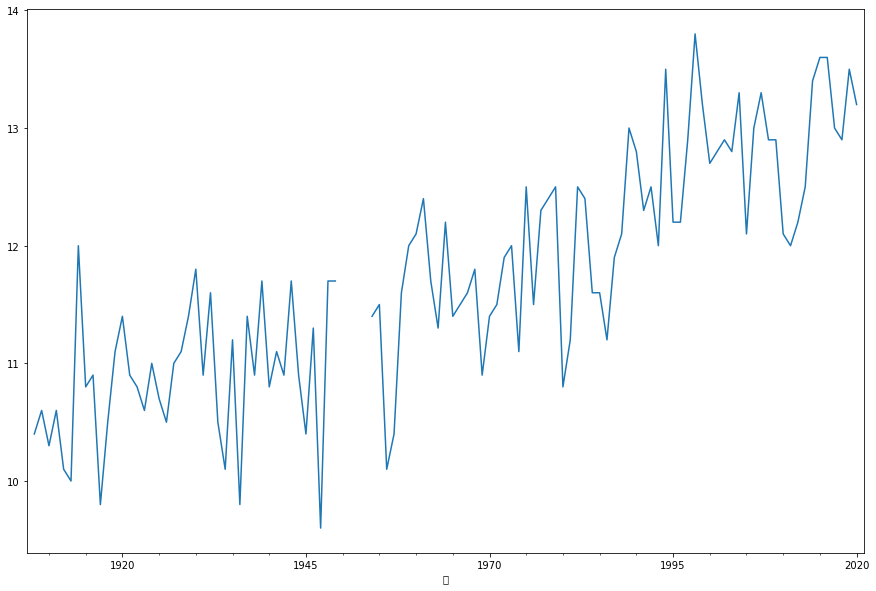

In [51]:
sel_temp['평균기온'].plot(figsize=(15,10))

<AxesSubplot:xlabel='년'>

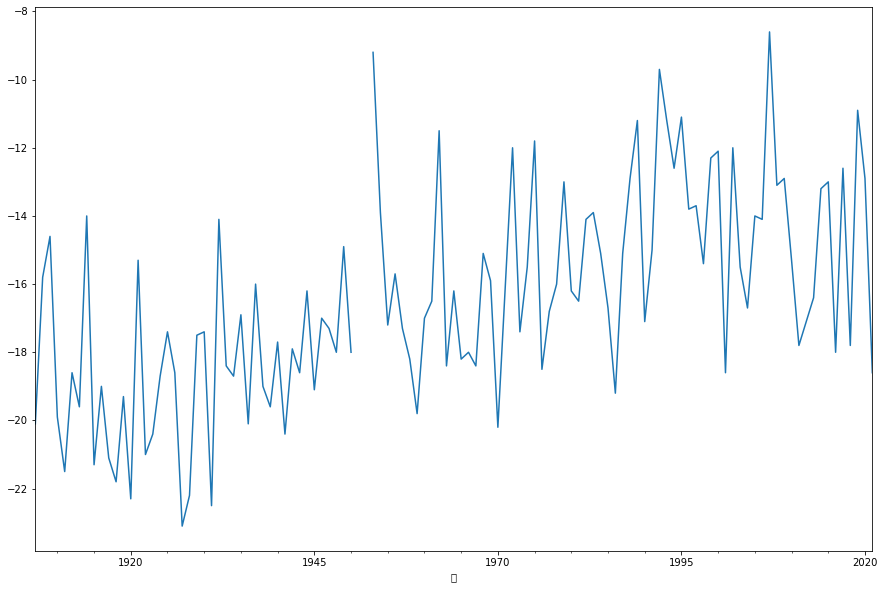

In [52]:
sel_temp['최저기온'].plot(figsize=(15,10))

<AxesSubplot:xlabel='년'>

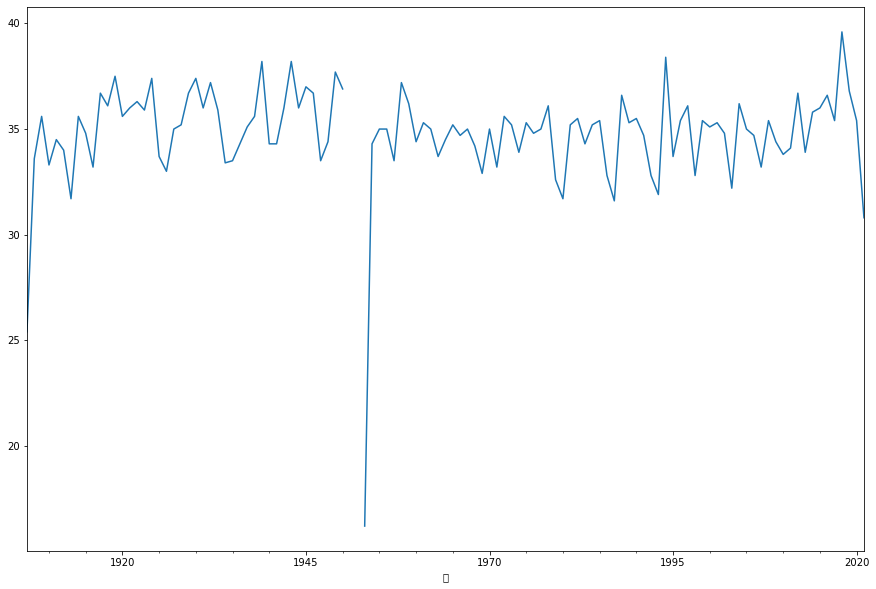

In [53]:
sel_temp['최고기온'].plot(figsize=(15,10))

<AxesSubplot:xlabel='최고기온', ylabel='최저기온'>

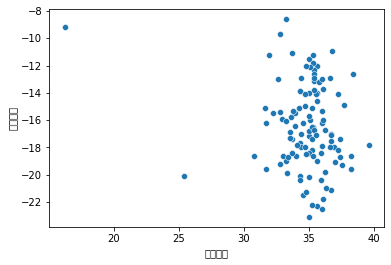

In [56]:
sns.scatterplot(x="최고기온", y="최저기온", data=sel_temp)

In [60]:
cor = sel_temp.select_dtypes("float").corr()

<AxesSubplot:>

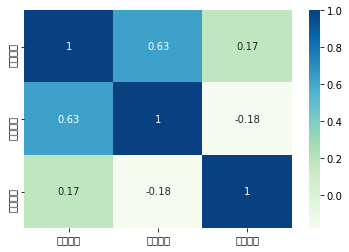

In [61]:
sns.heatmap(cor, cmap="GnBu", annot=True, annot_kws={"size" : 10})

### 자전거 데이터 시각화

<AxesSubplot:xlabel='대여소번호', ylabel='이용건수'>

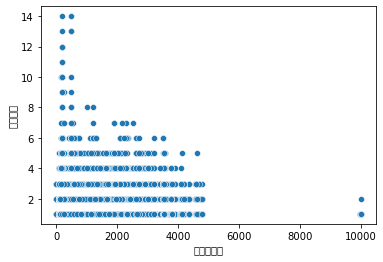

In [59]:
#자전거 데이터
sns.scatterplot(x="대여소번호", y="이용건수", data=bike_data)

In [71]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718857 entries, 0 to 718856
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   대여일자    718857 non-null  object 
 1   대여시간    718857 non-null  int64  
 2   대여소번호   718857 non-null  int64  
 3   대여소명    718857 non-null  object 
 4   대여구분코드  718857 non-null  object 
 5   연령대코드   718857 non-null  object 
 6   이용건수    718857 non-null  int64  
 7   운동량     718857 non-null  object 
 8   탄소량     718857 non-null  object 
 9   이동거리    718857 non-null  float64
 10  사용시간    718857 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 60.3+ MB


In [194]:
a = bike_data['대여소번호'].value_counts()
b=a.head(20)

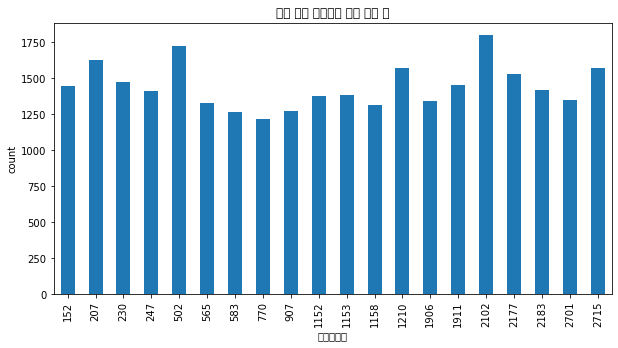

In [195]:
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
b.sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여소번호')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다

In [167]:
make_chart = user_data[['대여소번호', '이용건수']]
make_chart

,대여소번호,이용건수
대여소명,,
1152. 마곡역교차로,1379,1379
"1153. 발산역 1번, 9번 인근 대여소",1386,1386
1158. 가양역 8번출구,1315,1315
1210. 롯데월드타워(잠실역2번출구 쪽),1571,1571
152. 마포구민체육센터 앞,1446,1446
1906. 신도림역 1번 출구 앞,1345,1345
1911. 구로디지털단지역 앞,1455,1455
207. 여의나루역 1번출구 앞,1625,1625
2102. 봉림교 교통섬,1799,1799


<AxesSubplot:xlabel='대여소명', ylabel='이용건수'>

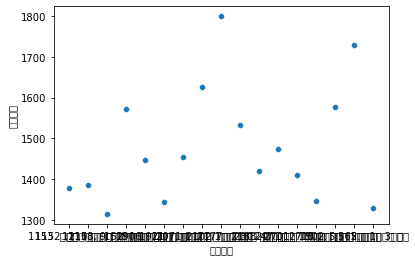

In [176]:
sns.scatterplot(x="대여소명", y="이용건수", data=make_chart)

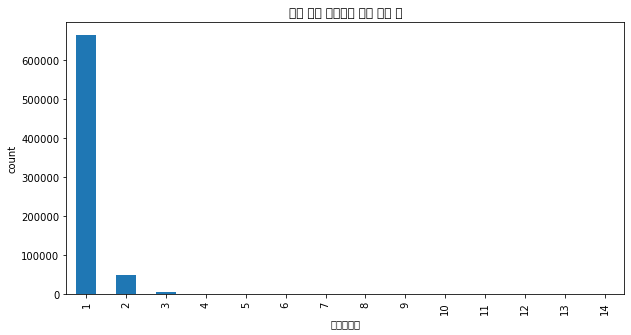

In [177]:
plt.figure(figsize=(10,5))# 있어도 되고 없어도 되는 코드, 다만 캔버스를 준비한다는 의미
bike_data['이용건수'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여소번호')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() # 캔버스를 보여준다